In [1]:
import pandas as pd 
from sklearn.metrics import  r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_excel("C:/Users/BHAN/Desktop/student_performance_no_names.xlsx")

In [3]:
df

,StudentID,MathScore,ReadingScore,WritingScore,Passed
0,1,46,74,43,No
1,2,4,46,41,No
2,3,28,97,87,Yes
3,4,10,87,70,No
4,5,0,93,91,No
...,...,...,...,...,...
5995,5996,41,32,54,No
5996,5997,43,42,28,No
5997,5998,20,76,9,No
5998,5999,27,4,27,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   StudentID     6000 non-null   int64 
 1   MathScore     6000 non-null   int64 
 2   ReadingScore  6000 non-null   int64 
 3   WritingScore  6000 non-null   int64 
 4   Passed        6000 non-null   object
dtypes: int64(4), object(1)
memory usage: 234.5+ KB


In [5]:
df.isnull()

,StudentID,MathScore,ReadingScore,WritingScore,Passed
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5995,False,False,False,False,False
5996,False,False,False,False,False
5997,False,False,False,False,False
5998,False,False,False,False,False


In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,StudentID,MathScore,ReadingScore,WritingScore,Passed
0,1,46,74,43,No
1,2,4,46,41,No
2,3,28,97,87,Yes
3,4,10,87,70,No
4,5,0,93,91,No


In [8]:
df.describe()

,StudentID,MathScore,ReadingScore,WritingScore
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,49.385833,49.712167,49.849667
std,1732.195139,29.232221,29.189050,28.970053
min,1.000000,0.000000,0.000000,0.000000
25%,1500.750000,24.000000,25.000000,25.000000
50%,3000.500000,50.000000,49.000000,50.000000
75%,4500.250000,75.000000,75.000000,75.000000
max,6000.000000,100.000000,100.000000,100.000000


In [9]:
df.count()

StudentID       6000
MathScore       6000
ReadingScore    6000
WritingScore    6000
Passed          6000
dtype: int64

In [10]:
df.isnull().sum()

StudentID       0
MathScore       0
ReadingScore    0
WritingScore    0
Passed          0
dtype: int64

In [11]:
df['Passed']=df['Passed'].map({'Yes':1,'No':0})

In [12]:
X=df.iloc[:,0:4]
y=df.iloc[:,-1]

In [13]:
X

,StudentID,MathScore,ReadingScore,WritingScore
0,1,46,74,43
1,2,4,46,41
2,3,28,97,87
3,4,10,87,70
4,5,0,93,91
...,...,...,...,...
5995,5996,41,32,54
5996,5997,43,42,28
5997,5998,20,76,9
5998,5999,27,4,27


In [14]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: Passed, Length: 6000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [17]:
X_test

,StudentID,MathScore,ReadingScore,WritingScore
1782,1783,55,62,17
3917,3918,84,36,81
221,222,55,84,76
2135,2136,45,60,54
5224,5225,95,32,14
...,...,...,...,...
2337,2338,57,97,97
3515,3516,66,33,23
4519,4520,2,92,32
5910,5911,73,65,59


In [18]:
y_test

1782    0
3917    0
221     1
2135    0
5224    0
       ..
2337    1
3515    0
4519    0
5910    0
4713    0
Name: Passed, Length: 1500, dtype: int64

In [19]:
X_train

,StudentID,MathScore,ReadingScore,WritingScore
2847,2848,47,0,49
4336,4337,18,53,66
3386,3387,73,35,3
1721,1722,99,57,37
2404,2405,71,70,19
...,...,...,...,...
3772,3773,48,34,79
5191,5192,46,74,51
5226,5227,65,35,52
5390,5391,27,36,34


In [20]:
y_train

2847    0
4336    0
3386    0
1721    0
2404    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Passed, Length: 4500, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier        

In [22]:
fit_rf=RandomForestClassifier(random_state=380)

In [23]:
# fit the model to the training data

fit_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=380)

In [24]:
prediction_rf=fit_rf.predict(X_train)

In [25]:
print(prediction_rf)

[0 0 0 ... 0 0 0]


In [26]:
random_forest_classifier_accuracy = fit_rf.score(X_test,y_test)
random_forest_classifier_accuracy

0.9806666666666667

In [27]:
treemodel =RandomForestClassifier(random_state = 42)

In [28]:
treemodel.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [29]:
parameter = {
    'max_depth': [2,3,4,5],
    'bootstrap':[True,False],
    "max_features":["auto","sqrt","log2",None],
    "criterion":["gini","entropy"]
}

cv = GridSearchCV(treemodel, param_grid=parameter, cv=5, scoring='accuracy')

In [30]:
cv.fit(X_train,y_train) 

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='accuracy')

In [31]:
cv.score(X_test,y_test)

0.974

In [44]:
score1 = accuracy_score(y_pred,y_test)
print(score1)

0.8733333333333333


In [33]:
from sklearn.metrics import accuracy_score,classification_report       

In [34]:
from sklearn.tree import DecisionTreeClassifier 

In [35]:
tree_model=DecisionTreeClassifier(max_depth=1)

In [36]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [37]:
y_pred = tree_model.predict(X_test)

In [38]:
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
cv.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1500
           1       0.00      0.00      0.00         0

    accuracy                           0.87      1500
   macro avg       0.50      0.44      0.47      1500
weighted avg       1.00      0.87      0.93      1500



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
tree_model=DecisionTreeClassifier(max_depth=1)

In [46]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [47]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figure=(15,10))


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

[Text(0.5, 0.75, 'x[1] <= 61.5\ngini = 0.216\nsamples = 4500\nvalue = [3946.0, 554.0]'),
 Text(0.25, 0.25, 'gini = 0.064\nsamples = 2753\nvalue = [2662.0, 91.0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.39\nsamples = 1747\nvalue = [1284, 463]'),
 Text(0.625, 0.5, '  False')]

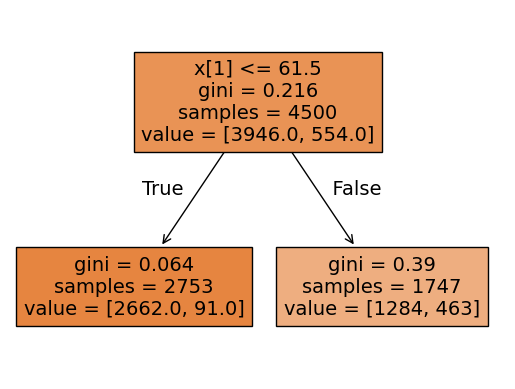

In [48]:
tree.plot_tree(tree_model,filled=True)

In [49]:
y_pred = tree_model.predict(X_test)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score,classification_report       

In [52]:
score2 = accuracy_score(y_pred,y_test)
print(score2)

0.8733333333333333


In [53]:
parameter = {'criterion':['gini','entropy','log_loss'],
             'splitter':['best','random'],
             'max_depth':[1,2,3,4,5],
             'max_features':['auto','sqrt','log2'],
             'ccp_alpha':[1,2,3,4,5,6,7]}



In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
tree_model=DecisionTreeClassifier()
cv=GridSearchCV(tree_model,param_grid=parameter,cv=5,
scoring='accuracy')

In [56]:
cv.fit(X_train,y_train)

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1050 fits failed out of a total of 3150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [57]:
from sklearn.metrics import accuracy_score,classification_report       

In [ ]:
df.head()

In [58]:
cv.score(X_test,y_test)

0.8733333333333333

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1500
           1       0.00      0.00      0.00         0

    accuracy                           0.87      1500
   macro avg       0.50      0.44      0.47      1500
weighted avg       1.00      0.87      0.93      1500



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [61]:
knn.fit(X_train,y_train)
y_prediction=knn.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
score3=accuracy_score(y_true=y_test,y_pred=y_prediction,normalize=True)
print("%2f"%score3)

0.938000


In [63]:
a = pd.DataFrame({'Model' : ['Decision Tree','Random Forest','KNN'],
                  'Accuracy' : [score1,score2,score3]})
                  
a.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '1px solid black')]}])

,Model,Accuracy
0,Decision Tree,0.873333
1,Random Forest,0.873333
2,KNN,0.938000


In [67]:
StudentID	= int(input("Enter StudentID"))
MathScore	= int(input("Enter MathScore"))
ReadingScore = int(input("Enter ReadingScore"))
WritingScore  = int(input("Enter WritingScore"))
prediction1=tree_model.predict([[StudentID,MathScore,ReadingScore,WritingScore]])
prediction1

Enter StudentID 1
Enter MathScore 46
Enter ReadingScore 74
Enter WritingScore 43


C:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [66]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
StudentID	= int(input("Enter StudentID"))
MathScore	= int(input("Enter MathScore"))
ReadingScore = int(input("Enter ReadingScore"))
WritingScore  = int(input("Enter WritingScore"))
prediction2=knn.predict([[StudentID,MathScore,ReadingScore,WritingScore]])
prediction1

Enter StudentID 1
Enter MathScore 46
Enter ReadingScore 74
Enter WritingScore 43


C:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [69]:
StudentID	= int(input("Enter StudentID"))
MathScore	= int(input("Enter MathScore"))
ReadingScore = int(input("Enter ReadingScore"))
WritingScore  = int(input("Enter WritingScore"))
prediction3=fit_rf.predict([[StudentID,MathScore,ReadingScore,WritingScore]])
prediction1

Enter StudentID 1
Enter MathScore 46
Enter ReadingScore 74
Enter WritingScore 43


C:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [70]:
predict={'Model':['Decisin Tree Classifier','Random Forest Classification','KNeighbors Classification'],
         'Prediction':[prediction1,prediction2,prediction3]}
Prediction_comparison=pd.DataFrame(predict)
Prediction_comparison

,Model,Prediction
0,Decisin Tree Classifier,[0]
1,Random Forest Classification,[0]
2,KNeighbors Classification,[0]


In [71]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [73]:
gnb.fit(X_train,y_train)

GaussianNB()

In [74]:
y_pred=gnb.predict(X_test)

In [76]:
score4= accuracy_score(y_test, y_pred)
print('Naive Bayes Classification:',score4)

Naive Bayes Classification: 0.9473333333333334


In [77]:
a = pd.DataFrame({'Model' : ['Decision Tree','Random Forest','KNN','GaussianNB'],
                  'Accuracy' : [score1,score2,score3,score4]})
                  
a.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '1px solid black')]}])

,Model,Accuracy
0,Decision Tree,0.873333
1,Random Forest,0.873333
2,KNN,0.938000
3,GaussianNB,0.947333


In [97]:
StudentID	= int(input("Enter StudentID"))
MathScore	= int(input("Enter MathScore"))
ReadingScore = int(input("Enter ReadingScore"))
WritingScore  = int(input("Enter WritingScore"))
prediction4=gnb.predict([[StudentID,MathScore,ReadingScore,WritingScore]])
prediction4

Enter StudentID 1
Enter MathScore 46
Enter ReadingScore 74
Enter WritingScore 43


C:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [80]:
predict={'Model':['Decisin Tree Classifier','Random Forest Classification','KNeighbors Classification','GaussianNB'],
         'Prediction':[prediction1,prediction2,prediction3,prediction4]}
Prediction_comparison=pd.DataFrame(predict)
Prediction_comparison

,Model,Prediction
0,Decisin Tree Classifier,[0]
1,Random Forest Classification,[0]
2,KNeighbors Classification,[0]
3,GaussianNB,[0]


In [81]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [82]:
classifier

LogisticRegression()

In [83]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],
             'C':[1,2,3,4,5,6,10,20,30,40,50],
             'max_iter': [300,400]}

In [84]:
classifier_regressor = GridSearchCV(classifier,
                                    param_grid = parameter,
                                    cv=5)

In [86]:
# fitting the data

classifier_regressor.fit(X_train,y_train)

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
220 fits failed out of a total of 330.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python310\lib\site-packages\sklea

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [87]:
print(classifier_regressor.best_params_)


{'C': 6, 'max_iter': 300, 'penalty': 'l2'}


In [88]:
print(classifier_regressor.best_score_)

1.0


In [90]:
#prediction 
classifier_regressor.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [91]:
y_pred = classifier_regressor.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score
score5 = accuracy_score(y_pred,y_test)
score5

1.0

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1310
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [96]:
a = pd.DataFrame({'Model' : ['Decision Tree','Random Forest','KNN','GaussianNB','LogisticRegression'],
                  'Accuracy' : [score1,score2,score3,score4,score5]})
                  
a.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '1px solid black')]}])

,Model,Accuracy
0,Decision Tree,0.873333
1,Random Forest,0.873333
2,KNN,0.938000
3,GaussianNB,0.947333
4,LogisticRegression,1.000000


In [98]:
StudentID	= int(input("Enter StudentID"))
MathScore	= int(input("Enter MathScore"))
ReadingScore = int(input("Enter ReadingScore"))
WritingScore  = int(input("Enter WritingScore"))
prediction5=classifier_regressor.predict([[StudentID,MathScore,ReadingScore,WritingScore]])
prediction5

Enter StudentID 1
Enter MathScore 46
Enter ReadingScore 74
Enter WritingScore 43


C:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [99]:
predict={'Model':['Decisin Tree Classifier','Random Forest Classification','KNeighbors Classification','GaussianNB','LogisticRegression'],
         'Prediction':[prediction1,prediction2,prediction3,prediction4,prediction5]}
Prediction_comparison=pd.DataFrame(predict)
Prediction_comparison

,Model,Prediction
0,Decisin Tree Classifier,[0]
1,Random Forest Classification,[0]
2,KNeighbors Classification,[0]
3,GaussianNB,[0]
4,LogisticRegression,[0]
